In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np
import pandas as pd

In [2]:
#!wget --no-check-certificate \
#    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
#    -O /tmp/songdata.csv

In [3]:
def tokenize_corpus(corpus,num_words=-1):
    if num_words>-1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [4]:
def create_lyrics_corpus(dataset,field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation),'')
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != '']
    return corpus

In [5]:
dataset = pd.read_csv('songdata.csv',dtype=str)[:10]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [6]:
corpus = create_lyrics_corpus(dataset,'text')
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index)+1

In [7]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

In [8]:
max_sequence_len = max([len(seq) for seq in sequences])
max_sequence_len

20

In [9]:
sequences = np.array(pad_sequences(sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences, labels = sequences[:,:-1],sequences[:,-1]

In [10]:
one_hot_labels = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional

Epoch 1/200
62/62 [==============================] - 4s 7ms/step - loss: 6.0031 - accuracy: 0.0298
Epoch 2/200
62/62 [==============================] - 0s 7ms/step - loss: 5.4410 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 0s 7ms/step - loss: 5.3671 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 0s 6ms/step - loss: 5.3060 - accuracy: 0.0378
Epoch 5/200
62/62 [==============================] - 0s 6ms/step - loss: 5.2264 - accuracy: 0.0419
Epoch 6/200
62/62 [==============================] - 0s 6ms/step - loss: 5.1507 - accuracy: 0.0454
Epoch 7/200
62/62 [==============================] - 0s 5ms/step - loss: 5.0852 - accuracy: 0.0459
Epoch 8/200
62/62 [==============================] - 0s 6ms/step - loss: 5.0199 - accuracy: 0.0595
Epoch 9/200
62/62 [==============================] - 0s 6ms/step - loss: 4.9524 - accuracy: 0.0651
Epoch 10/200
62/62 [==============================] - 0s 6ms/step - loss: 4.8789 - accuracy: 0.0691
Epoch 11/

62/62 [==============================] - 0s 6ms/step - loss: 1.3285 - accuracy: 0.7129
Epoch 84/200
62/62 [==============================] - 0s 7ms/step - loss: 1.3225 - accuracy: 0.7149
Epoch 85/200
62/62 [==============================] - 0s 6ms/step - loss: 1.3254 - accuracy: 0.7129
Epoch 86/200
62/62 [==============================] - 0s 6ms/step - loss: 1.3247 - accuracy: 0.7144
Epoch 87/200
62/62 [==============================] - 0s 6ms/step - loss: 1.2742 - accuracy: 0.7235
Epoch 88/200
62/62 [==============================] - 0s 6ms/step - loss: 1.2489 - accuracy: 0.7235
Epoch 89/200
62/62 [==============================] - 0s 6ms/step - loss: 1.2205 - accuracy: 0.7356
Epoch 90/200
62/62 [==============================] - 0s 6ms/step - loss: 1.2025 - accuracy: 0.7371
Epoch 91/200
62/62 [==============================] - 0s 6ms/step - loss: 1.1891 - accuracy: 0.7397
Epoch 92/200
62/62 [==============================] - 0s 6ms/step - loss: 1.1643 - accuracy: 0.7447
Epoch 93/200


Epoch 164/200
62/62 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.8764
Epoch 165/200
62/62 [==============================] - 0s 6ms/step - loss: 0.5449 - accuracy: 0.8729
Epoch 166/200
62/62 [==============================] - 0s 7ms/step - loss: 0.5247 - accuracy: 0.8789
Epoch 167/200
62/62 [==============================] - 0s 6ms/step - loss: 0.5057 - accuracy: 0.8814
Epoch 168/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.8789
Epoch 169/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.8845
Epoch 170/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.8840
Epoch 171/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4759 - accuracy: 0.8870
Epoch 172/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4710 - accuracy: 0.8885
Epoch 173/200
62/62 [==============================] - 0s 6ms/step - loss: 0.4671 - accurac

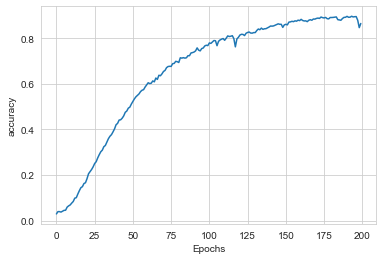

In [12]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(input_sequences,one_hot_labels,epochs=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graphs(history,'accuracy')

In [13]:

seed_text = "i m feeling chills"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted = np.random.choice([x for x in range(len(predicted_probs))],p=predicted_probs)
    output_word = ""
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)

i m feeling chills to me feel so cold long her fine fine end and take you baby cause found out a ride a selfish tool door candle ma ma ma ma ma ma ma ma ma ma ma ma ma ma ma me sound my life is sure my leave my life my hand is fine true like me you world me emptiness used world me more as you know talk my brother hand ways thousand come good on please are better candle take me ride tomorrow youre take good as god me better take him take never so cheap girl quiet girl
